In [1]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')

# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [70]:
import pandas as pd
import numpy as np

In [37]:
iris=pd.read_csv('iris.csv')

In [13]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
117,118,7.7,3.8,6.7,2.2,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
24,25,4.8,3.4,1.9,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
43,44,5.0,3.5,1.6,0.6,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Check if there are any missing values



In [38]:
iris = iris.fillna(0)
#iris

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [16]:
from sklearn import preprocessing

In [44]:
le = preprocessing.LabelEncoder()
le.fit(iris['Species'])
iris['Species']=  le.transform(iris['Species'])
# to check 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [45]:
iris.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.539500,-0.427175,0.793490,0.864447,0.942753
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652,0.622970
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073,-0.410273
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151,0.879652
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000,0.931308
Species,0.942753,0.622970,-0.410273,0.879652,0.931308,1.000000


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [46]:
iris.var()
#there are no columns to drop

Id               1938.000000
SepalLengthCm       0.901297
SepalWidthCm        0.307424
PetalLengthCm       3.256603
PetalWidthCm        0.586595
Species             0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

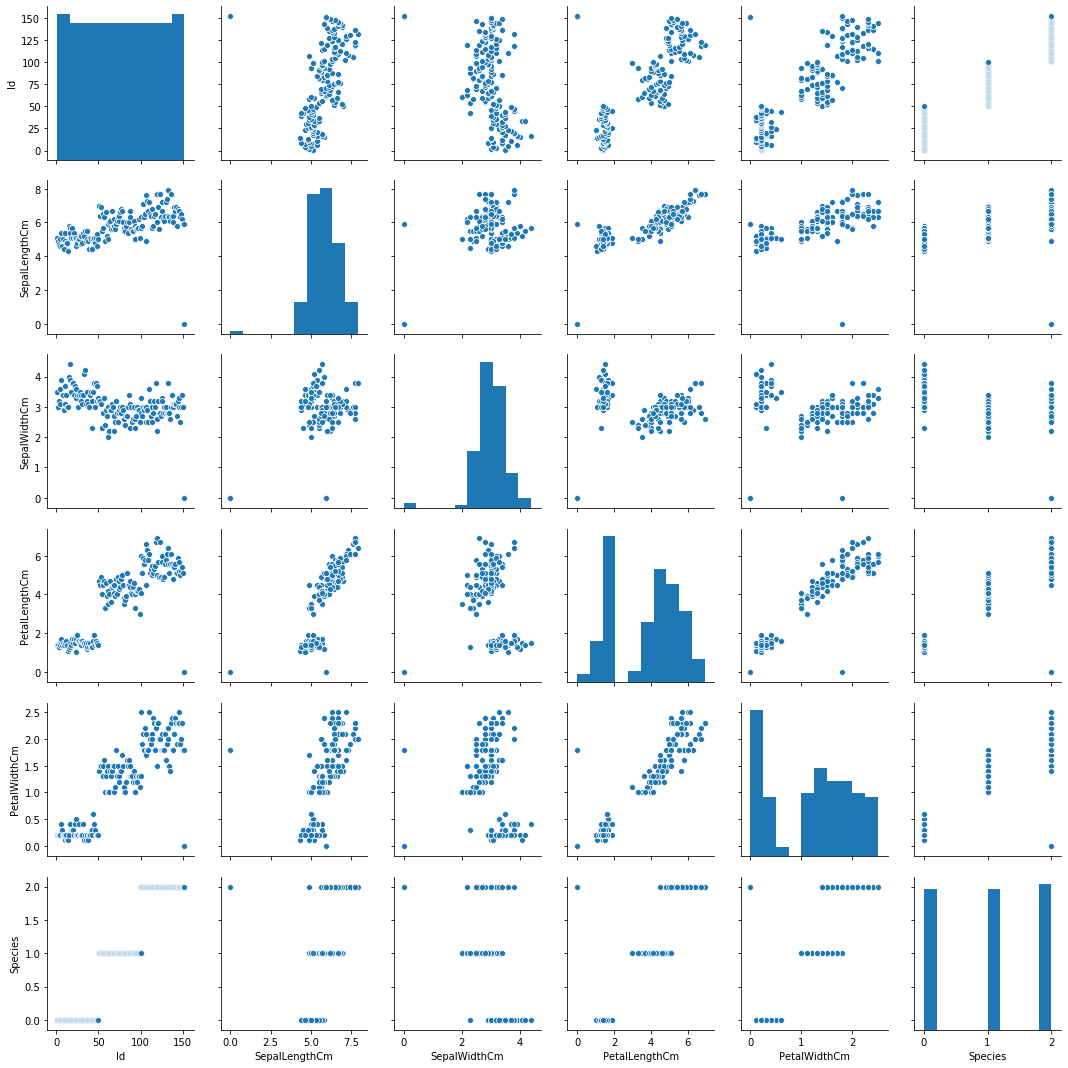

In [60]:
import seaborn as sns
sns.pairplot(iris)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [65]:
# The first column is id column and nothing to do with the model attriibutes. So drop it.
iris = iris.drop(labels = "Id", axis = 1)

In [68]:
iris.shape

(152, 5)

In [69]:
# Create a separate dataframe consisting only of the features i.e independent attributes

iris_feature_df = iris.drop(labels= "Species" , axis = 1)
iris_feature_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
x=np.array(iris_feature_df)
x.shape

(152, 4)

In [75]:
y=iris['Species']
y.shape

(152,)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
NNH = KNeighborsClassifier(n_neighbors= 5 )

In [90]:
# Call Nearest Neighbour algorithm
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
from sklearn import metrics

In [93]:
y_pred = NNH.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9354838709677419

In [94]:
#Accuracy of the model with different values of k = 3
NNH_3 = KNeighborsClassifier(n_neighbors= 3 )
NNH_3.fit(x_train, y_train)
y_pred3 = NNH_3.predict(x_test)
metrics.accuracy_score(y_test, y_pred3)

0.9354838709677419

In [95]:
#Accuracy of the model with different values of k = 9
NNH_9 = KNeighborsClassifier(n_neighbors= 9)
NNH_9.fit(x_train, y_train)
y_pred9 = NNH_9.predict(x_test)
metrics.accuracy_score(y_test, y_pred9)

0.9354838709677419

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Misclassification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [97]:
neighbours_list=[1,3,5,7,9,11,13,15,17,19]
mse=[]
for i in neighbours_list:
    NNH_loop = KNeighborsClassifier(n_neighbors= i)
    NNH_loop.fit(x_train, y_train)
    y_pred_loop = NNH_loop.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred_loop)
    mse.append(1-accuracy)
    
print(mse)

[0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812]


In [99]:
print("All the models has the same MSE")

All the models has the same MSE


## Plot accuracy

### Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

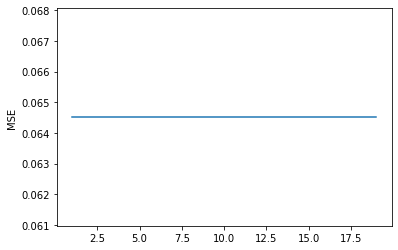

In [100]:
import matplotlib.pyplot as plt
plt.plot(neighbours_list, mse)
plt.ylabel('K')
plt.ylabel('MSE')
plt.show()